Bo Yang (Aaron) USCID:7526922531

### INF 552 HOMEWORK_3  Date: 10-10-2019

## (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [1]:
from past.translation import splitall
import pandas as pd
import warnings
import os
warnings.filterwarnings('ignore')
%matplotlib inline

ROOT_PATH = ".\\assets"
SPLASH = "\\"
FULL_COLUMNS =['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
TIME_DOMAIN = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

# util_data.py -> load_data_and_label
# read single file's content by filePath, columns is default
def load_data_and_label(filePath, columns=FULL_COLUMNS, hasTime=True):
    assert (filePath is not None) and (len(filePath) >= 1), "empty file path"
    if hasTime is False:
        columns = TIME_DOMAIN
    # >>> splitall('C:\\a\\b')   ==>  ['C:\\', 'a', 'b']
    label = splitall(filePath)[2]
    dataframe = pd.read_csv(filePath, encoding='utf-8', delimiter=",", skiprows=5, names=columns)
    return dataframe, label

# util_data.py -> load_multiple_files
# read multiple files 
def load_multiple_files(filePaths, columns=FULL_COLUMNS, hasTime=True):
    """read records from csv files"""
    assert (filePaths is not None) and (len(filePaths) >= 0), "empty file path"
    if hasTime is False:
        columns = TIME_DOMAIN
    dataFrameObj = pd.DataFrame()
    for index, path in enumerate(filePaths):
        fileItem, fileLabel = load_data_and_label(path, columns=columns)
        dataFrameObj = dataFrameObj.append(fileItem)

    return dataFrameObj

# util_data.py -> get_all_datasets_path
# get all files info from the path you assigned
def get_all_datasets_path(rootPath):
    filePaths = []
    for path, directories, files in os.walk(rootPath):
        for file in files:
            filePaths.append(os.path.join(path, file))
    return filePaths

In [2]:
# util_generate.py -> gen_test_data_file_paths
# generate test data file's name, return a list containing all these name
def gen_test_data_file_paths(rootPath=ROOT_PATH):
    filePaths = []
    dirs = os.listdir(rootPath)
    for index, dir in enumerate(dirs):
        filePaths.append(rootPath + SPLASH + dir + SPLASH + 'dataset1.csv')
        filePaths.append(rootPath + SPLASH + dir + SPLASH + 'dataset2.csv')
        if index > 1:
            filePaths.append(rootPath + SPLASH + dir + SPLASH + 'dataset3.csv')

    return filePaths

# util_generate.py -> gen_train_data_file_paths
# generate train data file's name, return a list containing all these name
def gen_train_data_file_paths(allFilePaths=None, testFilePaths=None):
    if allFilePaths is None:
        allFilePaths = get_all_datasets_path(ROOT_PATH)
    if testFilePaths is None:
        testFilePaths = gen_test_data_file_paths(ROOT_PATH)

    trainFilePaths = list(set(allFilePaths) - set(testFilePaths))
    trainFilePaths.sort(key=allFilePaths.index)
    return trainFilePaths

In [3]:
# find all the data files path in 'assets' dir
allFilePaths = get_all_datasets_path(ROOT_PATH)
# based on what the pdf said, we need to use some specific file as test data
testDataFileNames = gen_test_data_file_paths(ROOT_PATH)
trainDataFileNames = gen_train_data_file_paths()

testData = load_multiple_files(testDataFileNames)
trainData = load_multiple_files(trainDataFileNames)
print("Train Data [:3]: \n", trainData[:3])
print("Train Data Shape: ", trainData.to_numpy().shape)
print("Train Data [:3]: \n", testData[:3])
print("Test Data Shape: ", testData.to_numpy().shape)

Train Data [:3]: 
    time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0     0       42.0       0.71      21.25       0.43      30.00       0.00
1   250       41.5       0.50      20.25       1.48      31.25       1.09
2   500       41.5       0.50      14.25       1.92      33.00       0.00
Train Data Shape:  (33120, 7)
Train Data [:3]: 
    time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0     0      39.25       0.43      22.75       0.43      33.75        1.3
1   250      39.25       0.43      23.00       0.00      33.00        0.0
2   500      39.25       0.43      23.25       0.43      33.00        0.0
Test Data Shape:  (9120, 7)


## (c) Feature Extraction
### Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.

### i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

- Answer: There are nine features helping people to evaluate data, such as minimum, maximum, mean, median, standard deviation, first quartile, third quartile, skewness, kurtosis

### ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly

In [4]:
# util_statistic.py -> gen_statistic_result
# generate statistic result though the dataframe obj passed
def gen_statistic_result(dataFrameObj, fileItemIndex, hasTime=True):
    result = pd.DataFrame()
    startIndex = 1 if hasTime is True else 0
    for index, column in enumerate(dataFrameObj.columns[startIndex:]):
        data = {"min(" + str(index + 1) + ")": dataFrameObj[column].min(),
                "max(" + str(index + 1) + ")": dataFrameObj[column].max(),
                "mean(" + str(index + 1) + ")": dataFrameObj[column].mean(),
                "median(" + str(index + 1) + ")": dataFrameObj[column].median(),
                "standard deviation(" + str(index + 1) + ")": dataFrameObj[column].std(),
                "1st quart(" + str(index + 1) + ")": dataFrameObj[column].quantile(.25),
                "3rd quart(" + str(index + 1) + ")": dataFrameObj[column].quantile(.75)
                }
        temp = pd.DataFrame(data, index=[fileItemIndex])
        result = pd.concat([result, temp], axis=1)

    return result

# util_data.py -> is_bending
def is_bending(label):
    return 1 if label == "bending1" or label == 'bending2' else 0

In [5]:
statisticResult = pd.DataFrame()
for index, path in enumerate(allFilePaths):
    # get each file content and file label
    fileItem, fileLabel = load_data_and_label(path)
    # based on the data saved in file, we calculate the 6 statistic term(time-domain feature)
    staticResultItem = gen_statistic_result(fileItem, index + 1)
    staticResultItem["label"] = is_bending(fileLabel)
    statisticResult = statisticResult.append(staticResultItem)

print("-----------------\"Head of the Time-Domain DataSet\"----------------")
print(statisticResult.head())
print("---\"Shape of the Time-Domain DataSet\"----")
print("Time-Domain DataSet Shape: ", statisticResult.shape)

-----------------"Head of the Time-Domain DataSet"----------------
   min(1)  max(1)    mean(1)  median(1)  standard deviation(1)  1st quart(1)  \
1   37.25   45.00  40.624792      40.50               1.476967         39.25   
2   38.00   45.67  42.812812      42.50               1.435550         42.00   
3   35.00   47.40  43.954500      44.33               1.558835         43.00   
4   33.00   47.75  42.179813      43.50               3.670666         39.15   
5   33.00   45.75  41.678063      41.75               2.243490         41.33   

   3rd quart(1)  min(2)  max(2)   mean(2)  ...  1st quart(5)  3rd quart(5)  \
1         42.00     0.0    1.30  0.358604  ...       33.0000         36.00   
2         43.67     0.0    1.22  0.372438  ...       32.0000         34.50   
3         45.00     0.0    1.70  0.426250  ...       35.3625         36.50   
4         45.00     0.0    3.00  0.696042  ...       30.4575         36.33   
5         42.75     0.0    2.83  0.535979  ...       28.4575  

### iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [6]:
import numpy as np
import pprint

confidence_interval = {}
for column in statisticResult.columns:
    itemCIRange = []
    for i in range(0, 999):
        # Return a random sample of items from an axis of object.
        ran_sample = statisticResult[column].sample(n=10, replace=True)
        stat = ran_sample.std()
        itemCIRange.append(stat)
    itemCIRange.sort()
    lowerValue = np.percentile(itemCIRange, 0.05)
    upperValue = np.percentile(itemCIRange, 0.95)
    confidence_interval[column] = [lowerValue, upperValue]

pp = pprint.PrettyPrinter(depth=2)
pp.pprint(confidence_interval)

{'1st quart(1)': [2.46920892840855, 3.5173451433722565],
 '1st quart(2)': [0.06785299175423291, 0.22308933186405316],
 '1st quart(3)': [1.0592539837991821, 1.6078580743883721],
 '1st quart(4)': [0.15859560330531794, 0.22205104518255855],
 '1st quart(5)': [1.3987060948088248, 1.7794718431463816],
 '1st quart(6)': [0.019987539345161218, 0.1834768910598335],
 '3rd quart(1)': [1.940166303367067, 2.394903148844292],
 '3rd quart(2)': [0.08592007499511586, 0.2641238693352177],
 '3rd quart(3)': [1.1385533979811593, 1.5153453314996073],
 '3rd quart(4)': [0.1703022689910542, 0.25415838113086736],
 '3rd quart(5)': [1.1465474090326637, 1.444386248284577],
 '3rd quart(6)': [0.16057861177945243, 0.9109934041737009],
 'label': [0.0, 0.0],
 'max(1)': [0.9486296252214514, 1.3062442368774265],
 'max(2)': [1.4420027257231256, 2.5778220332070316],
 'max(3)': [1.2062109109469537, 1.9562012737282384],
 'max(4)': [0.8886942389668326, 1.2586226842324226],
 'max(5)': [1.3317865859818547, 1.7330429600953419],
 

### iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max)

- Answer: as you wish, I choose min, mean and max

## (d) Binary Classification Using Logistic Regression

### i. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).

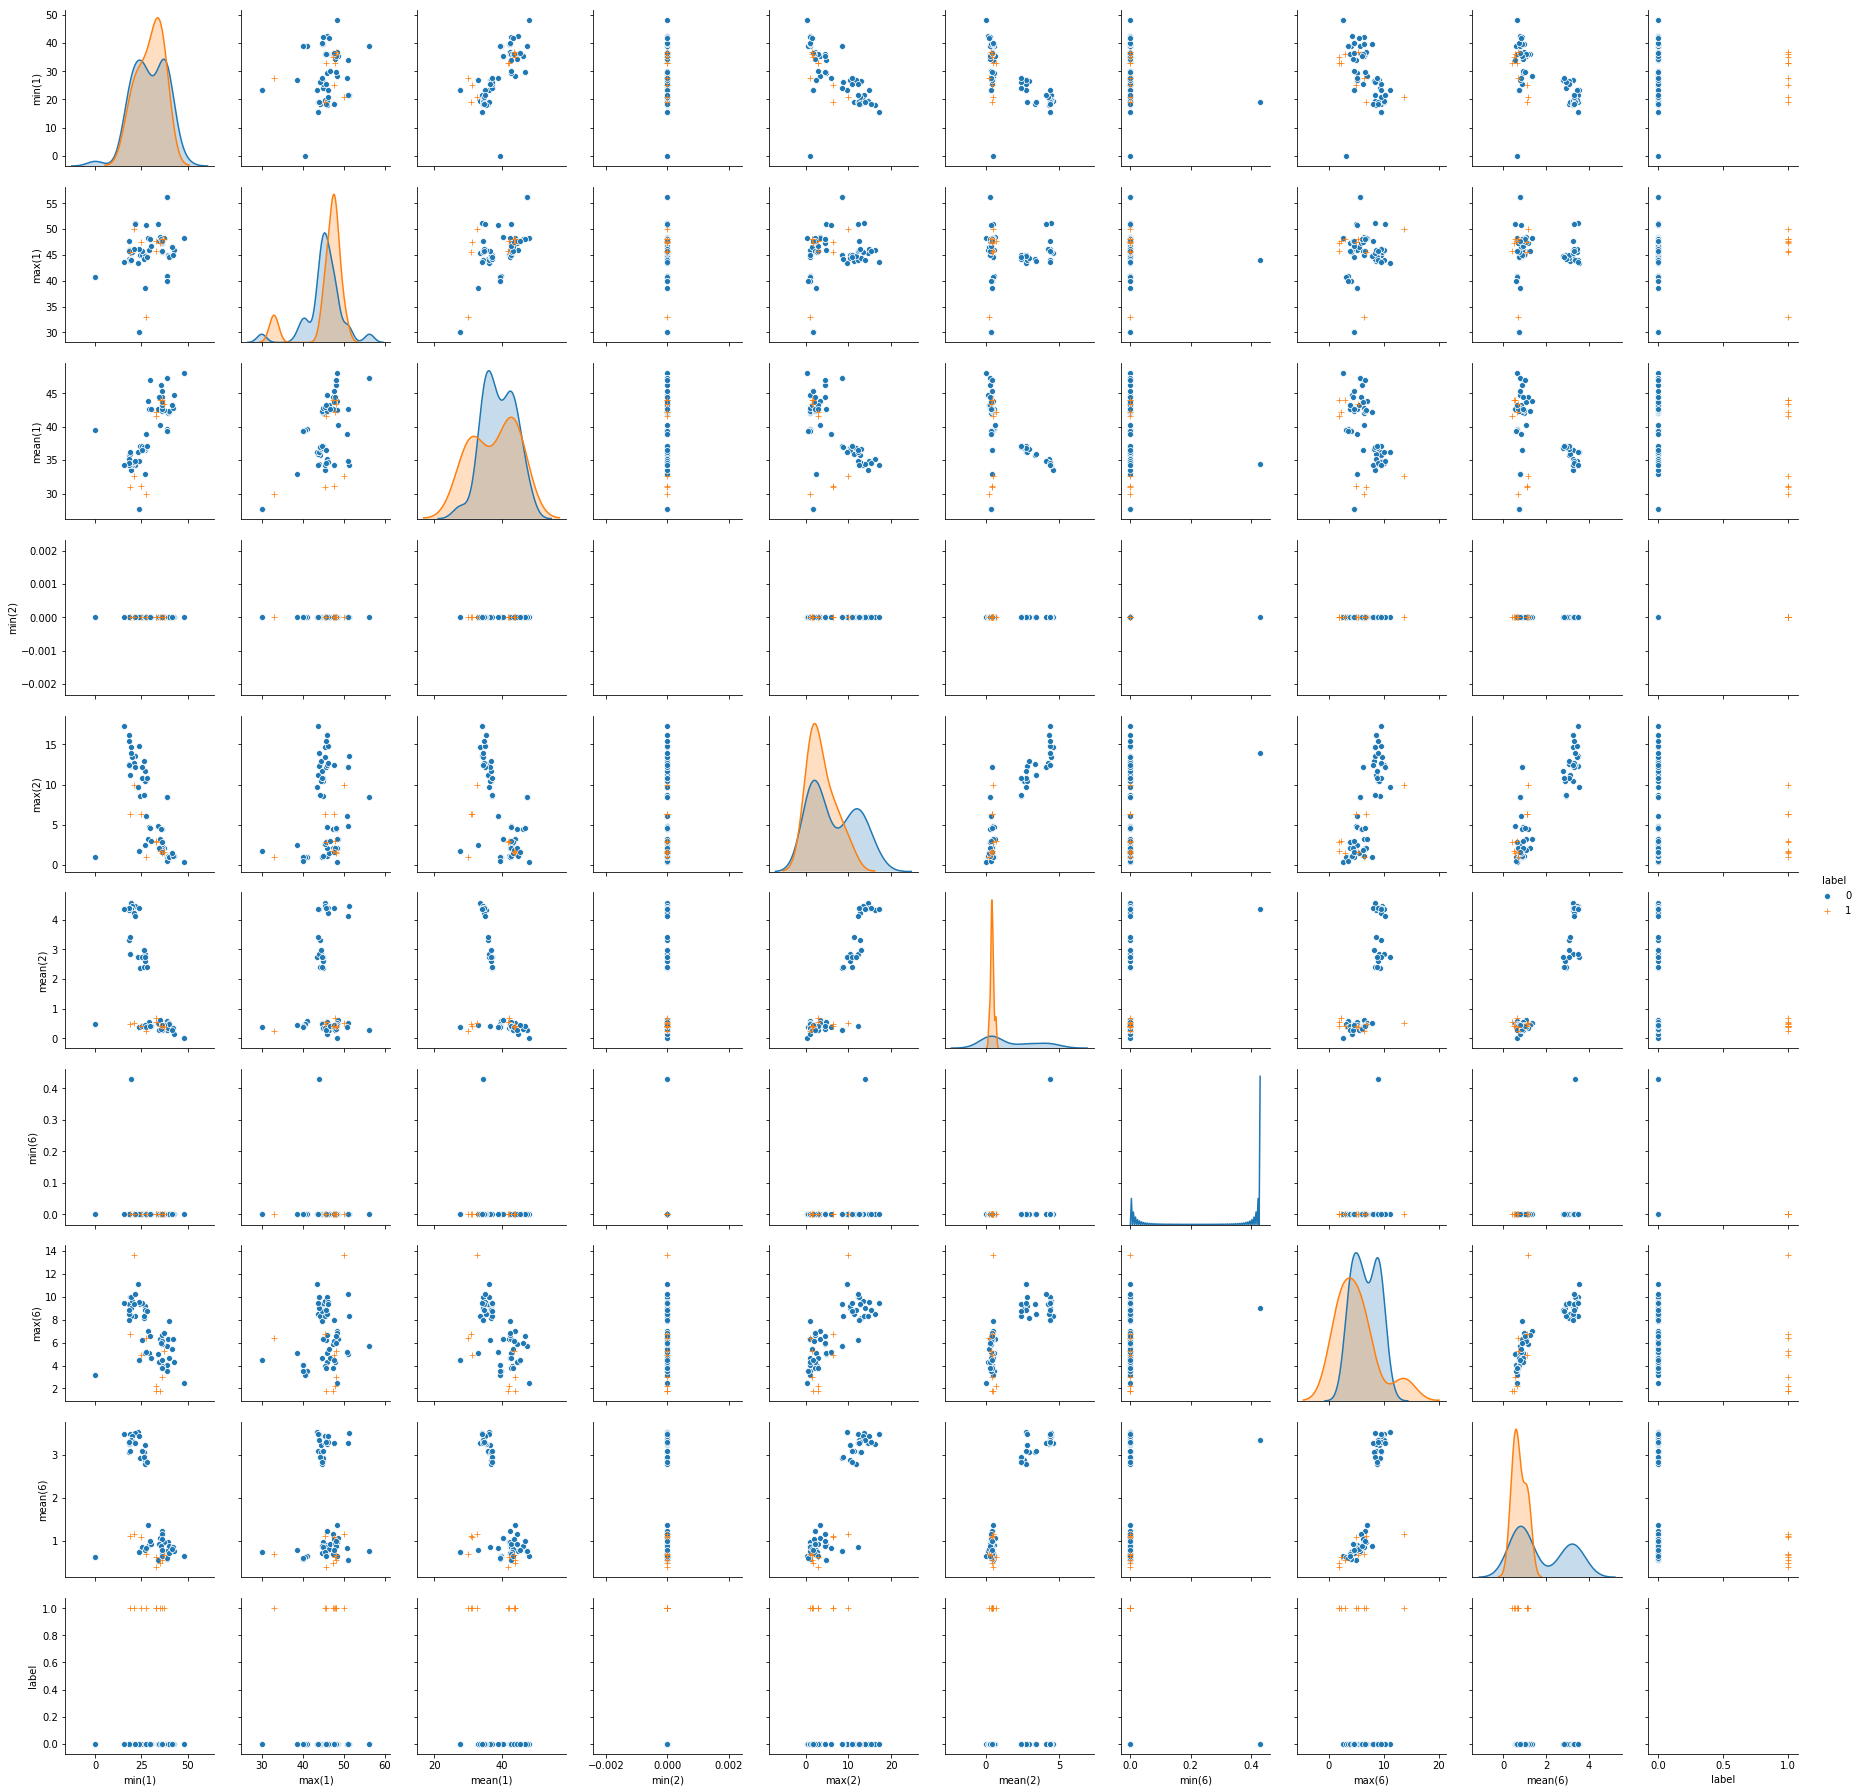

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# get all training data file paths
allTrainFilePaths = gen_train_data_file_paths()

trainStaticResult = pd.DataFrame()
for index, path in enumerate(allTrainFilePaths):
    fileItem, fileLabel = load_data_and_label(path)
    staticResultItem = gen_statistic_result(fileItem, index + 1)
    staticResultItem["label"] = is_bending(fileLabel)
    trainStaticResult = trainStaticResult.append(staticResultItem)

features = ['min(1)', 'max(1)', 'mean(1)', 'min(2)', 'max(2)', 'mean(2)', 'min(6)', 
            'max(6)', 'mean(6)', 'label']
subStatisticResult = trainStaticResult[features]
# print(subStatisticResult.to_string())
sns.pairplot(subStatisticResult, hue="label", markers=["o", "+"])
plt.show()

### ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 1(d)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 12. Do you see any considerable difference in the results with those of 1(d)i?

In [8]:
# util_data.py -> split_DF_in_parts
def split_DF_in_parts(datFrameObj, parts=2, needConcat=True):
    result = pd.DataFrame()
    division = len(datFrameObj) / float(parts)
    list = [datFrameObj.to_numpy()[int(round(division * i)): int(round(division * (i + 1)))] 
            for i in range(parts)]
    if needConcat:

        for index in range(len(list)):
            result = pd.concat([result, pd.DataFrame(list[index])], axis=1, sort=False)
    else:
        result = []
        for index in range(len(list)):
            result.append(pd.DataFrame(list[index]))
    return result

In [9]:
# util_generate.py -> gen_multiple_column_name
def gen_multiple_column_name(parts=2, hasTime=True):
    columns = FULL_COLUMNS if hasTime else TIME_DOMAIN
    names = []
    for index in range(parts):
        names.extend([str(column + "_" + str(index + 1)) for column in columns])

    return names

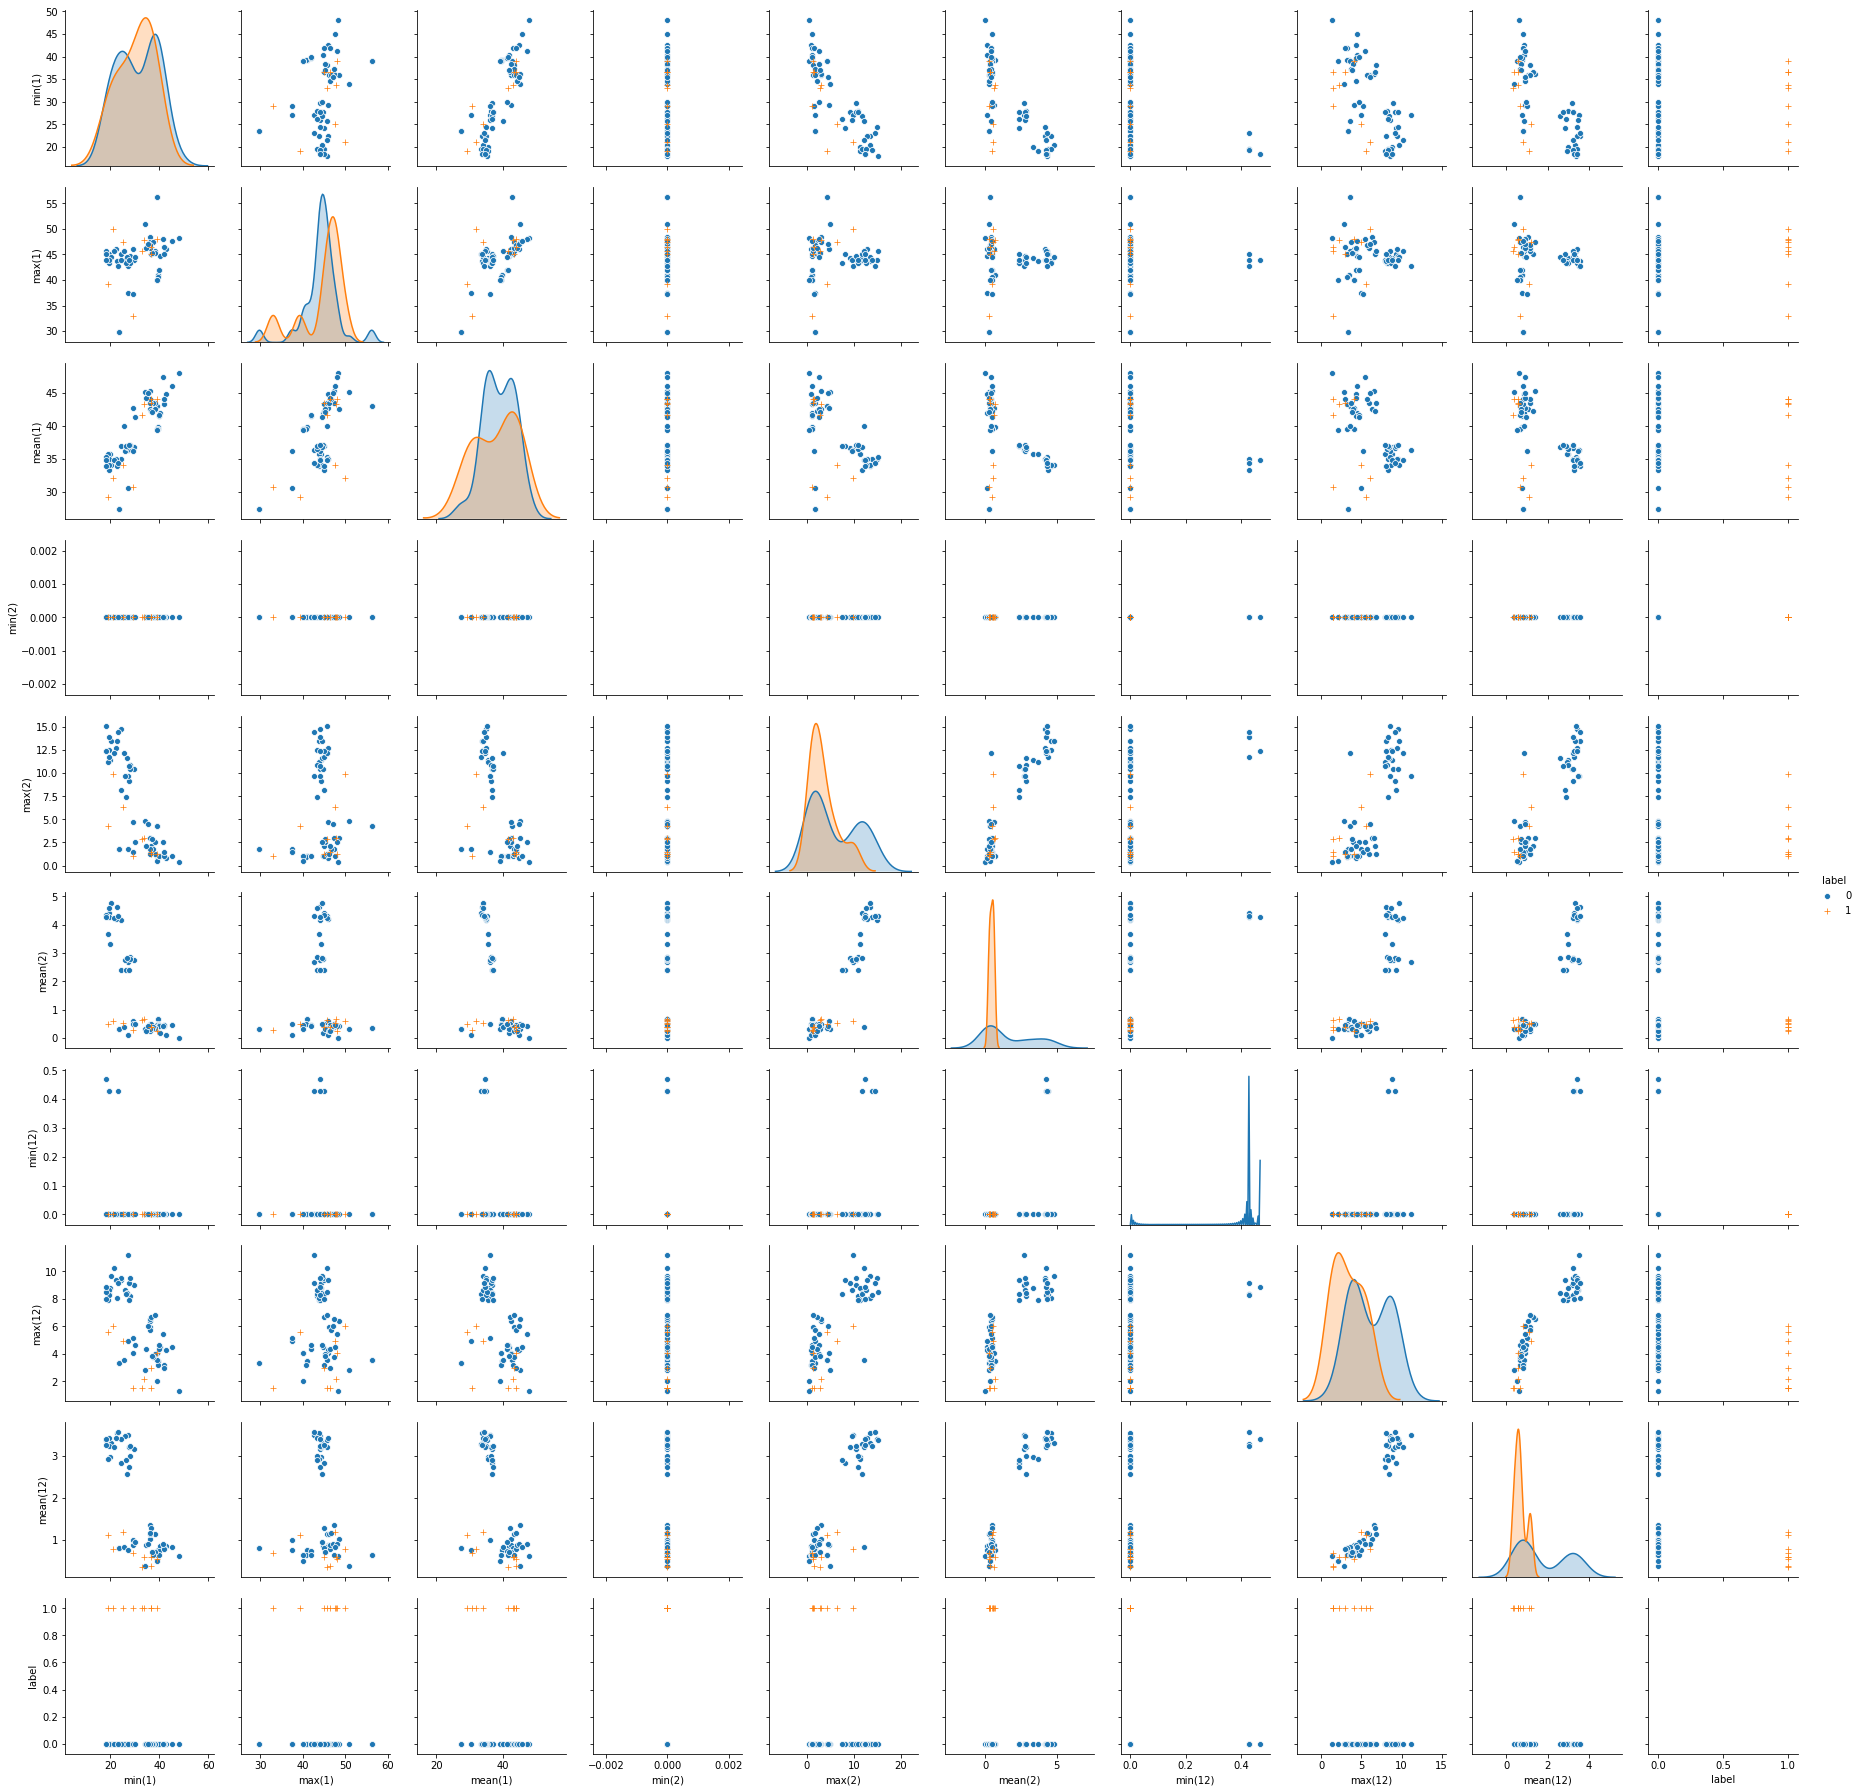

In [10]:
# based on what the pdf said, we need to use all training data
trainStaticResult = pd.DataFrame()
for index, path in enumerate(allTrainFilePaths):
    fileItem, fileLabel = load_data_and_label(path, hasTime=False)
    gluedFile = split_DF_in_parts(fileItem, parts=2, needConcat=True)
    gluedFile.columns = gen_multiple_column_name(hasTime=False)
    staticResultItem = gen_statistic_result(gluedFile, index + 1, hasTime=False)
    staticResultItem["label"] = is_bending(fileLabel)
    trainStaticResult = trainStaticResult.append(staticResultItem)

features = ['min(1)', 'max(1)', 'mean(1)', 'min(2)', 'max(2)', 'mean(2)', 'min(12)', 
            'max(12)', 'mean(12)', 'label']
subStatisticResult = trainStaticResult[features]
sns.pairplot(subStatisticResult, hue="label", markers=["o", "+"])
plt.show()

- Answers: There is no significant difference between these two figures.

### iii. Break each time series in your training set into l ∈ {1,2,...,20} time series of approximately equal length and use logistic regression to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features. Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem. Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed. In the following, you can see an example of applying Python’s Recursive Feature Elimination, which is a backward selection algorithm, to logistic regression.

##### (i) Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features

In [11]:
# util_generate.py -> gen_multiple_label
def gen_multiple_label(parts=6):
    labels = []
    for index in range(parts*6):
        labels.extend(["min(" + str(index + 1) + ")",
                       "max(" + str(index + 1) + ")",
                       "mean(" + str(index + 1) + ")",
                       "median(" + str(index + 1) + ")",
                       "standard deviation(" + str(index + 1) + ")",
                       "1st quart(" + str(index + 1) + ")",
                       "3rd quart(" + str(index + 1) + ")"])

    return labels

In [12]:
import sys
import statsmodels.api as sm

if not sys.warnoptions:
    warnings.simplefilter("ignore")

# based on what the pdf said, we need to use all training data
trainStaticResult = pd.DataFrame()
for parts in range(1, 21):
    for index, path in enumerate(allTrainFilePaths):
        fileItem, fileLabel = load_data_and_label(path, hasTime=False)
        splitedDFs = split_DF_in_parts(fileItem, parts=parts, needConcat=False)
        statisticResultTemp = pd.DataFrame()
        for DFItem in splitedDFs:
            staticResultTempItem = gen_statistic_result(DFItem, index + 1, hasTime=False)
            statisticResultTemp = statisticResultTemp.append(staticResultTempItem, sort=False)

        statisticResultTemp["label"] = is_bending(fileLabel)
        trainStaticResult = trainStaticResult.append(statisticResultTemp, sort=False)

    logitModel = sm.Logit(trainStaticResult['label'], 
                      trainStaticResult[gen_multiple_label(parts=1)])
    logitModelResults = logitModel.fit(method="bfgs",disp=0)
    # ['median(1)'] ['max(5)']
    significantVars = \
            [key for key, p_value in logitModelResults.pvalues.items() if p_value <= 0.05]
    if len(significantVars) > 0:
        print("When split all training data sets in {} times, "
                  "I got significant variables : ".format(parts), end=" ")
        print(' '.join(significantVars))
    significantVars = []
    # allocate a new space for statisticResult
    trainStaticResult = pd.DataFrame()

When split all training data sets in 9 times, I got significant variables :  median(1)
When split all training data sets in 10 times, I got significant variables :  max(5)


##### (ii) Use 5-fold cross-validation to determine the best value of the pair (l, p)

In [13]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

trainStaticResult = pd.DataFrame()
rfeSources = {}
significantVars = dict()
for parts in range(1, 21):
    for index, path in enumerate(allTrainFilePaths):
        fileItem, fileLabel = load_data_and_label(path, hasTime=False)
        gluedFile = split_DF_in_parts(fileItem, parts=parts, needConcat=True)
        gluedFile.columns = gen_multiple_column_name(parts=parts, hasTime=False)
        staticResultItem = gen_statistic_result(gluedFile, index + 1, hasTime=False)
        staticResultItem["label"] = is_bending(fileLabel)
        trainStaticResult = trainStaticResult.append(staticResultItem, sort=False)

    logitModel = LogisticRegression()
    recursiveFeatureEliminationObj = RFECV(estimator=logitModel, 
                                           cv=StratifiedKFold(5), 
                                           scoring='accuracy')
    trainStatColumns = list(trainStaticResult.columns.values)
    recursiveFeatureEliminationObj.fit(trainStaticResult[trainStatColumns[:-1]],
                                       trainStaticResult['label'])

    labels = gen_multiple_label(parts)
    rfeSources[parts] = recursiveFeatureEliminationObj.grid_scores_[
        recursiveFeatureEliminationObj.n_features_ - 1]
    tempList = list()
    for index, value in enumerate(labels):
        if recursiveFeatureEliminationObj.support_[index] == True:
            tempList.append(value)

    significantVars[parts] = tempList
    # allocate a new space for trainStaticResult
    trainStaticResult = pd.DataFrame()

bestL = [key for maxValue in [max(rfeSources.values())] 
         for key, val in rfeSources.items() if val == maxValue][0]
print("Best l : ", bestL)
selectedFeatures = significantVars[bestL]
print("selectedFeatures : ", selectedFeatures)

Best l :  3
selectedFeatures :  ['min(5)', '3rd quart(5)', '3rd quart(7)', 'max(18)']


### iv. Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.

-----------"Confusion Matrix"-------------
Predicted   0  1  All
True                 
0          60  0   60
1           0  9    9
All        60  9   69
-----------"Params"-------------
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.07877700732989e-10
            Iterations: 40
            Function evaluations: 45
            Gradient evaluations: 40
min(5)           2.393852
3rd quart(5)    18.877688
3rd quart(7)    -9.218630
max(18)        -15.575264
dtype: float64
-----------"P-values"-------------
min(5)          1.0
3rd quart(5)    1.0
3rd quart(7)    1.0
max(18)         1.0
dtype: float64


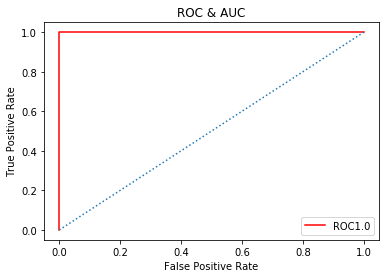

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

statisticResult = pd.DataFrame()
for index, path in enumerate(allTrainFilePaths):
    fileItem, fileLabel = load_data_and_label(path, hasTime=False)
    gluedFile = split_DF_in_parts(fileItem, parts=bestL, needConcat=True)
    gluedFile.columns = gen_multiple_column_name(parts=bestL, hasTime=False)
    staticResultItem = gen_statistic_result(gluedFile, index + 1, hasTime=False)
    staticResultItem["label"] = is_bending(fileLabel)
    statisticResult = statisticResult.append(staticResultItem, sort=False)

X_trainData = statisticResult[selectedFeatures]
y_trainData = statisticResult['label']

skLogitModel = LogisticRegression()
skLogitModel.fit(X_trainData, y_trainData)
skYPredict = skLogitModel.predict(X_trainData)

falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_trainData, skYPredict)
# compute Area Under the Curve (AUC) using the trapezoidal rule
area = auc(falsePositiveRate, truePositiveRate)
crosstab = pd.crosstab(y_trainData, skYPredict, 
                       rownames=['True'], colnames=['Predicted'], margins=True)
print("-----------\"Confusion Matrix\"-------------")
print(crosstab)
print("-----------\"Params\"-------------")
statLogitModel = sm.Logit(y_trainData, X_trainData).fit_regularized()
print(statLogitModel.params)
print("-----------\"P-values\"-------------")
print(statLogitModel.pvalues)

plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend()
plt.show()

### v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the featuresextracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [15]:
allTestFilePaths = gen_test_data_file_paths()
# based on what the pdf said, we need to use all training data
statisticResult = pd.DataFrame()
for index, path in enumerate(allTestFilePaths):
    fileItem, fileLabel = load_data_and_label(path, hasTime=False)
    gluedFile = split_DF_in_parts(fileItem, parts=bestL, needConcat=True)
    gluedFile.columns = gen_multiple_column_name(parts=bestL, hasTime=False)
    staticResultItem = gen_statistic_result(gluedFile, index + 1, hasTime=False)
    staticResultItem["label"] = is_bending(fileLabel)
    statisticResult = statisticResult.append(staticResultItem, sort=False)

X_testData = statisticResult[selectedFeatures]
y_testData = statisticResult['label']

logitModel = LogisticRegression()
logitModel.fit(X_testData, y_testData)
y_predict = logitModel.predict(X_testData)
print("The accuracy on the test set is ",logitModel.score(X_testData, y_testData))

The accuracy on the test set is  1.0


- Findings: the accuracy on the test set is the same as the score when we use train dataset.

### vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

- Answer: Yes

### vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

    min(1)  max(1)    mean(1)  median(1)  standard deviation(1)  1st quart(1)  \
1    38.75   46.50  43.945125     44.500               1.386745       42.7500   
2    35.25   47.75  43.621187     45.000               3.348026       42.6875   
3    33.00   45.00  40.673812     41.500               3.203229       38.0000   
4    41.00   48.00  44.792125     45.000               0.797137       45.0000   
5    40.75   45.00  43.067250     42.775               0.997720       42.0000   
6    21.00   50.00  27.839875     25.290               7.336640       24.2500   
7    30.00   33.00  31.124313     31.250               0.881477       30.2500   
8    25.25   39.25  31.110125     28.000               5.049328       27.0000   
9    25.00   47.50  36.337375     38.290               4.898639       30.5000   
10   29.67   44.00  36.885438     36.000               3.724168       33.7500   

    3rd quart(1)  min(2)  max(2)   mean(2)  ...  1st quart(17)  3rd quart(17)  \
1        45.0000     0.0   

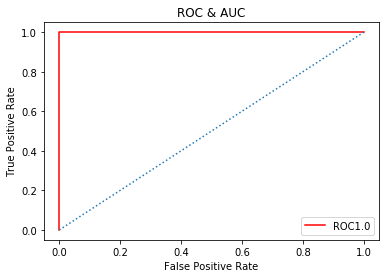

-----------"AUC value"-------------
AUC :  1.0


In [16]:
from sklearn.utils import resample

selectedFeatures = ['min(5)', '3rd quart(5)', '3rd quart(7)', 'max(18)', 'label']
allTrainFilePaths = gen_train_data_file_paths()
# based on what the pdf said, we need to use all training data
statisticResult = pd.DataFrame()
for index, path in enumerate(allTrainFilePaths):
    fileItem, fileLabel = load_data_and_label(path, hasTime=False)
    gluedFile = split_DF_in_parts(fileItem, parts=bestL, needConcat=True)
    gluedFile.columns = gen_multiple_column_name(parts=bestL, hasTime=False)
    staticResultItem = gen_statistic_result(gluedFile, index + 1, hasTime=False)
    staticResultItem["label"] = is_bending(fileLabel)
    statisticResult = statisticResult.append(staticResultItem, sort=False)

bendingDF = statisticResult[selectedFeatures][statisticResult.label == 1]
otherTypeDF = statisticResult[selectedFeatures][statisticResult.label == 0]

print(statisticResult[:10])

bootstrappedBendingDF = resample(bendingDF, replace=True, n_samples=60, random_state=2333)
gluedBendingDF = pd.concat([otherTypeDF, bootstrappedBendingDF])



X_data = gluedBendingDF[list(gluedBendingDF.columns.values)[:-1]]
y_data = gluedBendingDF['label']

logitModel = LogisticRegression()
logitModel.fit(X_data, y_data)
y_preidct = logitModel.predict(X_data)
crosstab = pd.crosstab(y_data, y_preidct, rownames=['True'], colnames=['Predicted'], margins=True)
print("-----------\"Confusion Matrix\"-------------")
print(crosstab)
falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_data, y_preidct)
# compute Area Under the Curve (AUC) using the trapezoidal rule
area = auc(falsePositiveRate, truePositiveRate)
plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend()
plt.show()
print("-----------\"AUC value\"-------------")
print("AUC : ", area)

## (e) Binary Classification Using L1-penalized logistic regression

### i. Repeat 1(d)iii using L1-penalized logistic regression, i.e. instead of using pvalues for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.

-----------"Test Error Rate"-------------
Test Error Rate :  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
-----------"Best L"-------------
Best l :  1


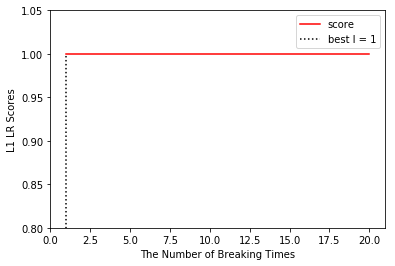

In [17]:
from sklearn.linear_model import LogisticRegressionCV

statisticResult = pd.DataFrame()
logitCVTestScores = list()
for parts in range(1, 21):
    for index, path in enumerate(allTrainFilePaths):
        fileItem, fileLabel = load_data_and_label(path, hasTime=False)
        gluedFile = split_DF_in_parts(fileItem, parts=parts, needConcat=True)
        gluedFile.columns = gen_multiple_column_name(parts=parts, hasTime=False)
        staticResultItem = gen_statistic_result(gluedFile, index + 1, hasTime=False)
        staticResultItem["label"] = is_bending(fileLabel)
        statisticResult = statisticResult.append(staticResultItem, sort=False)

    X_data = statisticResult[list(statisticResult.columns.values)[:-1]]
    y_data = statisticResult['label']
    logitModel = LogisticRegressionCV(cv=5, penalty="l1", solver="liblinear").fit(X_data, y_data)
    logitCVTestScores.append(logitModel.score(X_data, y_data))

    # allocate a new space for statisticResult
    statisticResult = pd.DataFrame()

print("-----------\"Test Error Rate\"-------------")
print("Test Error Rate : ", logitCVTestScores)
# # find the best l
bestL = logitCVTestScores.index(max(logitCVTestScores)) + 1
# bestL = 1
print("-----------\"Best L\"-------------")
print("Best l : ", bestL)

plt.plot(range(1, 21), logitCVTestScores, color='red', label='score')
plt.vlines(bestL, 0, 1, linestyles='dotted', label="best l = " + str(bestL))
plt.xlabel('The Number of Breaking Times')
plt.ylabel('L1 LR Scores')
plt.xlim(0, 21)
plt.ylim(0.8, 1.05)
plt.legend()
plt.show()

### ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

- Answer: LASSORegression is perform better and also easier to implement, obviously.

## (f) Multi-class Classification (The Realistic Case)

### i. Find the best l in the same way as you found it in 1(e)i to build an L1- penalized multinomial regression model to classify all activities in your training set. Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible

In [18]:
import enum

class DATASET_LABEL(enum.Enum):
    BENDING1 = 0
    BENDING2 = 0
    CYCLING = 1
    LYING = 2
    SITTING = 3
    STANDING = 4
    WALKING = 5

In [19]:
def convert_label_2_num(label):
	return DATASET_LABEL[str.upper(label)].value

-----------"Test Error Rate"-------------
Test Error Rate :  [0.052631578947368474, 0.1578947368421053, 0.21052631578947367, 0.21052631578947367, 0.21052631578947367, 0.10526315789473684, 0.26315789473684215, 0.1578947368421053, 0.1578947368421053, 0.1578947368421053, 0.1578947368421053, 0.1578947368421053, 0.1578947368421053, 0.1578947368421053, 0.1578947368421053, 0.1578947368421053, 0.1578947368421053, 0.21052631578947367, 0.10526315789473684, 0.052631578947368474]
-----------"Best L"-------------
Best l :  1
-----------"Confusion Matrix"-------------
Predicted  0  1  2  5  All
True                      
0          4  0  0  0    4
1          0  3  0  0    3
2          0  0  3  0    3
3          3  0  0  0    3
4          2  0  1  0    3
5          0  0  0  3    3
All        9  3  4  3   19


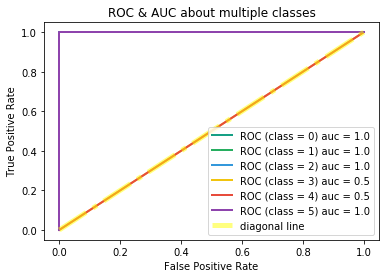

In [20]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

trainStaticResult = pd.DataFrame()
testStaticResult = pd.DataFrame()
logitCVTestErrorRateList = list()

for parts in range(1, 21):
    for index, path in enumerate(allTrainFilePaths):
        trainFileItem, trainFileLabel = load_data_and_label(path, hasTime=False)
        gluedTrainFile = split_DF_in_parts(trainFileItem, parts=parts, needConcat=True)
        gluedTrainFile.columns = gen_multiple_column_name(parts=parts, hasTime=False)
        trainStaticResultItem = gen_statistic_result(gluedTrainFile, index + 1, hasTime=False)
        trainStaticResultItem["label"] = convert_label_2_num(trainFileLabel)
        trainStaticResult = trainStaticResult.append(trainStaticResultItem, sort=False)

    for index, path in enumerate(allTestFilePaths):
        testFileItem, testFileLabel = load_data_and_label(path, hasTime=False)
        gluedTestFile = split_DF_in_parts(testFileItem, parts=parts, needConcat=True)
        gluedTestFile.columns = gen_multiple_column_name(parts=parts, hasTime=False)
        testStaticResultItem = gen_statistic_result(gluedTestFile, index + 1, hasTime=False)
        testStaticResultItem["label"] = convert_label_2_num(testFileLabel)
        testStaticResult = testStaticResult.append(testStaticResultItem, sort=False)

    X_train = trainStaticResult[list(trainStaticResult.columns.values)[:-1]]
    y_train = trainStaticResult['label']

    X_test = testStaticResult[list(testStaticResult.columns.values)[:-1]]
    y_test = testStaticResult['label']

    logitModel = LogisticRegressionCV(cv=5, penalty="l1", solver="liblinear").fit(X_train, y_train)
    logitCVTestErrorRateList.append(1 - logitModel.score(X_test, y_test))

    # allocate a new space for statisticResult
    trainStaticResult = pd.DataFrame()
    testStaticResult = pd.DataFrame()

print("-----------\"Test Error Rate\"-------------")
print("Test Error Rate : ", logitCVTestErrorRateList)
# # find the best l
bestL = logitCVTestErrorRateList.index(min(logitCVTestErrorRateList)) + 1
print("-----------\"Best L\"-------------")
print("Best l : ", bestL)

trainStaticResult = pd.DataFrame()
testStaticResult = pd.DataFrame()

# prepare to calculate confusion matrix
# get the raw data
for index, path in enumerate(allTrainFilePaths):
    trainFileItem, trainFileLabel = load_data_and_label(path, hasTime=False)
    gluedTrainFile = split_DF_in_parts(trainFileItem, parts=bestL, needConcat=True)
    gluedTrainFile.columns = gen_multiple_column_name(parts=bestL, hasTime=False)
    trainStaticResultItem = gen_statistic_result(gluedTrainFile, index + 1, hasTime=False)
    trainStaticResultItem["label"] = convert_label_2_num(trainFileLabel)
    trainStaticResult = trainStaticResult.append(trainStaticResultItem, sort=False)

for index, path in enumerate(allTestFilePaths):
    testFileItem, testFileLabel = load_data_and_label(path, hasTime=False)
    gluedTestFile = split_DF_in_parts(testFileItem, parts=bestL, needConcat=True)
    gluedTestFile.columns = gen_multiple_column_name(parts=bestL, hasTime=False)
    testStaticResultItem = gen_statistic_result(gluedTestFile, index + 1, hasTime=False)
    testStaticResultItem["label"] = convert_label_2_num(testFileLabel)
    testStaticResult = testStaticResult.append(testStaticResultItem, sort=False)

X_train = trainStaticResult[list(trainStaticResult.columns.values)[:-1]]
y_train = trainStaticResult['label']

X_test = testStaticResult[list(testStaticResult.columns.values)[:-1]]
y_test = testStaticResult['label']

# build an l1 penalized multinomial regression model to classify
# binary the multiple classes
bin_y_train = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5])
bin_y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])

classifier = OneVsRestClassifier(
    LogisticRegressionCV(cv=StratifiedKFold(5), penalty="l1", solver="liblinear")
).fit(X_train, bin_y_train)

# Confusion Matrix
# Returns the distance of each sample from the decision boundary for each class
y_score = classifier.fit(X_train, bin_y_train).decision_function(X_test)
y_predict = classifier.predict(X_test)
crosstab = pd.crosstab(bin_y_test.argmax(axis=1), y_predict.argmax(axis=1), rownames=['True'],
                       colnames=['Predicted'], margins=True)
print("-----------\"Confusion Matrix\"-------------")
print(crosstab)

# Compute ROC curve and AUC for each class
falsePositiveRate = dict()
truePositiveRate = dict()
areas = dict()
for i in range(bin_y_train.shape[1]):
    falsePositiveRate[i], truePositiveRate[i], _ = roc_curve(bin_y_test[:, i], y_score[:, i])
    areas[i] = auc(falsePositiveRate[i], truePositiveRate[i])

colors = ['#16a085', '#27ae60', '#3498db', '#f1c40f', '#e74c3c', '#8e44ad']
for index in range(bin_y_train.shape[1]):
    plt.plot(falsePositiveRate[index], truePositiveRate[index], color=colors[index],
             label='ROC (class = {}) auc = {}'.format(index, str(areas[index])), 
             linewidth=2, linestyle='-')

plt.plot([0, 1], [0, 1], linestyle='-.', linewidth=5, alpha=0.5, 
         color='yellow', label='diagonal line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC about multiple classes')
plt.legend()
plt.show()

### ii. Repeat 1(f)i using a Na¨ıve Bayes’ classifier. Use both Gaussian and Multinomial priors and compare the results.

#### (i)Gaussian

In [21]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

warnings.filterwarnings("ignore", category=DeprecationWarning)

trainStaticResult = pd.DataFrame()
testStaticResult = pd.DataFrame()
gaussianTestErrorRateList = list()

for parts in range(1, 21):
    for index, path in enumerate(allTrainFilePaths):
        trainFileItem, trainFileLabel = load_data_and_label(path, hasTime=False)
        gluedTrainFile = split_DF_in_parts(trainFileItem, parts=parts, needConcat=True)
        gluedTrainFile.columns = gen_multiple_column_name(parts=parts, hasTime=False)
        trainStaticResultItem = gen_statistic_result(gluedTrainFile, index + 1, hasTime=False)
        trainStaticResultItem["label"] = convert_label_2_num(trainFileLabel)
        trainStaticResult = trainStaticResult.append(trainStaticResultItem, sort=False)

    for index, path in enumerate(allTestFilePaths):
        testFileItem, testFileLabel = load_data_and_label(path, hasTime=False)
        gluedTestFile = split_DF_in_parts(testFileItem, parts=parts, needConcat=True)
        gluedTestFile.columns = gen_multiple_column_name(parts=parts, hasTime=False)
        testStaticResultItem = gen_statistic_result(gluedTestFile, index + 1, hasTime=False)
        testStaticResultItem["label"] = convert_label_2_num(testFileLabel)
        testStaticResult = testStaticResult.append(testStaticResultItem, sort=False)

    X_train = trainStaticResult[list(trainStaticResult.columns.values)[:-1]]
    y_train = trainStaticResult['label']

    X_test = testStaticResult[list(testStaticResult.columns.values)[:-1]]
    y_test = testStaticResult['label']

    gaussianClassifier = GaussianNB()
    gaussianTestErrorRateList.append(1 - np.mean(
        cross_val_score(gaussianClassifier, X_train, y_train, cv=5)))

    # allocate a new space for statisticResult
    trainStaticResult = pd.DataFrame()
    testStaticResult = pd.DataFrame()

print("-----------\"Test Error Rate\"-------------")
print("Test Error Rate : ", gaussianTestErrorRateList)
# # find the best l
bestL = gaussianTestErrorRateList.index(min(gaussianTestErrorRateList)) + 1
print("-----------\"Best L\"-------------")
print("Best l : ", bestL)

trainStaticResult = pd.DataFrame()
testStaticResult = pd.DataFrame()

# prepare to calculate confusion matrix
# get the raw data
for index, path in enumerate(allTrainFilePaths):
    trainFileItem, trainFileLabel = load_data_and_label(path, hasTime=False)
    gluedTrainFile = split_DF_in_parts(trainFileItem, parts=bestL, needConcat=True)
    gluedTrainFile.columns = gen_multiple_column_name(parts=bestL, hasTime=False)
    trainStaticResultItem = gen_statistic_result(gluedTrainFile, index + 1, hasTime=False)
    trainStaticResultItem["label"] = convert_label_2_num(trainFileLabel)
    trainStaticResult = trainStaticResult.append(trainStaticResultItem, sort=False)

for index, path in enumerate(allTestFilePaths):
    testFileItem, testFileLabel = load_data_and_label(path, hasTime=False)
    gluedTestFile = split_DF_in_parts(testFileItem, parts=bestL, needConcat=True)
    gluedTestFile.columns = gen_multiple_column_name(parts=bestL, hasTime=False)
    testStaticResultItem = gen_statistic_result(gluedTestFile, index + 1, hasTime=False)
    testStaticResultItem["label"] = convert_label_2_num(testFileLabel)
    testStaticResult = testStaticResult.append(testStaticResultItem, sort=False)

X_train = trainStaticResult[list(trainStaticResult.columns.values)[:-1]]
y_train = trainStaticResult['label']

X_test = testStaticResult[list(testStaticResult.columns.values)[:-1]]
y_test = testStaticResult['label']

params = {}
classifier = GridSearchCV(GaussianNB(), 
                          cv=StratifiedKFold(5), 
                          param_grid=params).fit(X_train, y_train)

y_predict = classifier.predict(X_test)
# Confusion Matrix
# Returns the distance of each sample from the decision boundary for each class
crosstab = pd.crosstab(y_test, y_predict, rownames=['True'],
                       colnames=['Predicted'], margins=True)
print("-----------\"Confusion Matrix\"-------------")
print(crosstab)

-----------"Test Error Rate"-------------
Test Error Rate :  [0.1997326203208557, 0.13877005347593596, 0.2540106951871658, 0.25704099821746884, 0.3108734402852049, 0.2888591800356506, 0.2775401069518717, 0.23734402852049896, 0.3423351158645277, 0.33885918003565063, 0.3070409982174688, 0.3408199643493761, 0.3108734402852049, 0.42762923351158644, 0.375668449197861, 0.3771836007130125, 0.417379679144385, 0.4458110516934046, 0.417379679144385, 0.4222816399286987]
-----------"Best L"-------------
Best l :  2
-----------"Confusion Matrix"-------------
Predicted  0  1  2  3  4  5  All
True                            
0          4  0  0  0  0  0    4
1          0  3  0  0  0  0    3
2          0  0  3  0  0  0    3
3          1  0  0  1  1  0    3
4          0  0  0  1  2  0    3
5          0  0  0  0  0  3    3
All        5  3  3  2  3  3   19


#### (ii) Multinomial

In [22]:
from sklearn.naive_bayes import MultinomialNB

warnings.filterwarnings("ignore", category=DeprecationWarning)

trainStaticResult = pd.DataFrame()
testStaticResult = pd.DataFrame()
gaussianTestErrorRateList = list()

for parts in range(1, 21):
    for index, path in enumerate(allTrainFilePaths):
        trainFileItem, trainFileLabel = load_data_and_label(path, hasTime=False)
        gluedTrainFile = split_DF_in_parts(trainFileItem, parts=parts, needConcat=True)
        gluedTrainFile.columns = gen_multiple_column_name(parts=parts, hasTime=False)
        trainStaticResultItem = gen_statistic_result(gluedTrainFile, index + 1, hasTime=False)
        trainStaticResultItem["label"] = convert_label_2_num(trainFileLabel)
        trainStaticResult = trainStaticResult.append(trainStaticResultItem, sort=False)

    for index, path in enumerate(allTestFilePaths):
        testFileItem, testFileLabel = load_data_and_label(path, hasTime=False)
        gluedTestFile = split_DF_in_parts(testFileItem, parts=parts, needConcat=True)
        gluedTestFile.columns = gen_multiple_column_name(parts=parts, hasTime=False)
        testStaticResultItem = gen_statistic_result(gluedTestFile, index + 1, hasTime=False)
        testStaticResultItem["label"] = convert_label_2_num(testFileLabel)
        testStaticResult = testStaticResult.append(testStaticResultItem, sort=False)

    X_train = trainStaticResult[list(trainStaticResult.columns.values)[:-1]]
    y_train = trainStaticResult['label']

    X_test = testStaticResult[list(testStaticResult.columns.values)[:-1]]
    y_test = testStaticResult['label']

    multinomialClassifier = MultinomialNB()
    gaussianTestErrorRateList.append(1 - np.mean(
        cross_val_score(multinomialClassifier, X_train, y_train, cv=5)))

    # allocate a new space for statisticResult
    trainStaticResult = pd.DataFrame()
    testStaticResult = pd.DataFrame()

print("-----------\"Test Error Rate\"-------------")
print("Test Error Rate : ", gaussianTestErrorRateList)
# # find the best l
bestL = gaussianTestErrorRateList.index(min(gaussianTestErrorRateList)) + 1
print("-----------\"Best L\"-------------")
print("Best l : ", bestL)

trainStaticResult = pd.DataFrame()
testStaticResult = pd.DataFrame()

# prepare to calculate confusion matrix
# get the raw data
for index, path in enumerate(allTrainFilePaths):
    trainFileItem, trainFileLabel = load_data_and_label(path, hasTime=False)
    gluedTrainFile = split_DF_in_parts(trainFileItem, parts=bestL, needConcat=True)
    gluedTrainFile.columns = gen_multiple_column_name(parts=bestL, hasTime=False)
    trainStaticResultItem = gen_statistic_result(gluedTrainFile, index + 1, hasTime=False)
    trainStaticResultItem["label"] = convert_label_2_num(trainFileLabel)
    trainStaticResult = trainStaticResult.append(trainStaticResultItem, sort=False)

for index, path in enumerate(allTestFilePaths):
    testFileItem, testFileLabel = load_data_and_label(path, hasTime=False)
    gluedTestFile = split_DF_in_parts(testFileItem, parts=bestL, needConcat=True)
    gluedTestFile.columns = gen_multiple_column_name(parts=bestL, hasTime=False)
    testStaticResultItem = gen_statistic_result(gluedTestFile, index + 1, hasTime=False)
    testStaticResultItem["label"] = convert_label_2_num(testFileLabel)
    testStaticResult = testStaticResult.append(testStaticResultItem, sort=False)

X_train = trainStaticResult[list(trainStaticResult.columns.values)[:-1]]
y_train = trainStaticResult['label']

X_test = testStaticResult[list(testStaticResult.columns.values)[:-1]]
y_test = testStaticResult['label']

params = {}
classifier = GridSearchCV(MultinomialNB(), 
                          cv=StratifiedKFold(5), 
                          param_grid=params).fit(X_train, y_train)

y_predict = classifier.predict(X_test)
# Confusion Matrix
# Returns the distance of each sample from the decision boundary for each class
crosstab = pd.crosstab(y_test, y_predict, rownames=['True'],
                       colnames=['Predicted'], margins=True)
print("-----------\"Confusion Matrix\"-------------")
print(crosstab)

-----------"Test Error Rate"-------------
Test Error Rate :  [0.16827094474153292, 0.16185383244206775, 0.19180035650623883, 0.15008912655971485, 0.15008912655971485, 0.16185383244206775, 0.17361853832442065, 0.15008912655971485, 0.15695187165775404, 0.15695187165775404, 0.15695187165775404, 0.15695187165775404, 0.15695187165775404, 0.15695187165775404, 0.14518716577540114, 0.15695187165775404, 0.14518716577540114, 0.15695187165775404, 0.17513368983957223, 0.15695187165775404]
-----------"Best L"-------------
Best l :  15
-----------"Confusion Matrix"-------------
Predicted  0  1  2  3  4  5  All
True                            
0          4  0  0  0  0  0    4
1          0  3  0  0  0  0    3
2          0  0  3  0  0  0    3
3          0  0  0  2  1  0    3
4          0  0  0  1  2  0    3
5          0  0  0  0  0  3    3
All        4  3  3  3  3  3   19


### iii. Which method is better for multi-class classification in this problem?

- Answer: I think the multinomial is greater than the gaussian in this topic. the average of score I got from multinomial Naive Bayes is higher than the Gaussian's.

## LSLR 3.7.4
### I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. $Y = β_0 + β_1*X + β_2*X^2 + β_3*X^3 + ε$

#### (a) Suppose that the true relationship between X and Y is linear, i.e. $Y = β_0 + β_1*X + ε$. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

- Answer: After executing the following code hundreds of times, we can always get lower RSS when using cubic regression. The reason is obvious. When we use polynomial features, we get more parameters. implying that the generated curve will try to fit more data points than a straight line.

MSE for linear regression:  0.9939150973605626
MSE for cubic regression:  0.9714335692818367


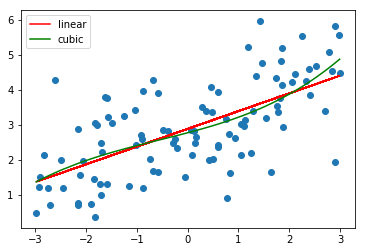

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1, 1)

# assume the relationship between X and Y is linear y = 0.5X + 3 + ε
y = 3 + 0.5 * x + np.random.normal(0, 1, 100)

# Since the formula of MSE is 1 /n * (∑((y_hat - y_true)^2)) and RSS is ∑((y_hat - y_true)^2)
# so MSE = 1 / n * (RSS), we can use MSE to evaluate our algorithm for convenience

# get MSE(RSS) fpr the linear regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_p1 = lin_reg.predict(X)

# get MSE(RSS) for the cubic regression
cubic_reg = Pipeline([("polynomial_features", PolynomialFeatures(degree=3)),
                         ("linear_regression", LinearRegression())])
cubic_reg.fit(X, y)
y_p2 = cubic_reg.predict(X)

# plot figures
plt.scatter(x, y)
plt.plot(x, y_p1, color='r', label="linear")
plt.plot(np.sort(x), y_p2[np.argsort(x)], color='g', label="cubic")
plt.legend()
print("MSE for linear regression: ", mean_squared_error(y, y_p1))
print("MSE for cubic regression: ", mean_squared_error(y, y_p2))

#### (b) Answer (a) using test rather than training RSS

- Answer: test RSS of cubic regression will higher than the linear regression. Since we try to use more parameters to fit the data point, it is highly likely that we have overfitting. So cubic regression may not respond accurately when the cubic regression was assigned to predict the unseen data.

### (c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

- Answer: Cubic regression will has a lower training RSS. for the same reason, more parameters mean the regression model will fit more data points, causing a lesser RSS and even overfitting.

### (d) Answer (c) using test rather than training RSS.

- Answer: Cubic regression will has a much higher testing RSS.

## LSLR 4.7.3
### This problem relates to the QDA model, in which the observations within each class are drawn from a normal distribution with a class specific mean vector and a class specific covariance matrix. We consider the simple case where p = 1; i.e. there is only one feature.

### Suppose that we have K classes, and that if an observation belongs to the k th class then X comes from a one-dimensional normal distribution, X ∼ N($μ_k, μ_k^2$). Recall that the density function for the one-dimensional normal distribution is given in (4.11). Prove that in this case, the Bayes’ classifier is not linear. Argue that it is in fact quadratic.

![](https://user-images.githubusercontent.com/24391143/66019082-a1113e80-e496-11e9-8452-f4d2395b66e1.PNG)

##### Hint: For this problem, you should follow the arguments laid out in Section 4.4.2, but without making the assumption that $σ_1^2 = ... =σ_1k^2$

- Answer:

![](https://user-images.githubusercontent.com/24391143/66602272-9b82bb00-eb5e-11e9-932c-4c55b99f7d29.PNG)

## LSLR 4.7.7

### Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on X, last year’s percent profit. We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was $\overline{X}$= 10, while the mean for those that didn’t was  $\overline{X}$ = 0. In addition, the variance of X for these two sets of companies was $\hat{σ}^2$= 36. Finally, 80 % of companies issued dividends. Assuming that X follows a normal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was X = 4 last year.

#### Hint: Recall that the density function for a normal random variable is ![img](https://user-images.githubusercontent.com/24391143/65837918-b37e5300-e2b1-11e9-9058-5109b3081940.png) You will need to use Bayes’ theorem

- Answer: based on what the question said, we have two classes, so k = 2. πk = 0.8, μρ = 10, σ^2 = 36, and also we have

![](https://user-images.githubusercontent.com/24391143/66020786-27308380-e49d-11e9-982d-a0f00ebcddfb.png)

$${P_{(4)}  = {{(0.8 ∗ e− ^{({1\over 72})∗({4 - 10})^2})} \over {{(0.8 ∗ e− ^{({1\over 72})∗({4 - 10})^2}) + {(0.2 ∗ e− ^{({1\over 72})∗({4 - 0})^2})}}}} = 0.752$$

![](https://user-images.githubusercontent.com/24391143/66588759-01147e80-eb42-11e9-8502-c3e241088300.PNG)